In [1]:
import spacy
!python -m spacy download ro_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 74.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ro_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ro.300.vec.gz
!gunzip cc.ro.300.vec.gz


--2026-01-13 22:47:54--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ro.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.14, 3.163.189.108, 3.163.189.51, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1233659733 (1.1G) [binary/octet-stream]
Saving to: ‘cc.ro.300.vec.gz’

cc.ro.300.vec.gz    100%[===================>]   1.15G  69.2MB/s    in 17s     

2026-01-13 22:48:11 (69.0 MB/s) - ‘cc.ro.300.vec.gz’ saved [1233659733/1233659733]



In [3]:
!wget https://raw.githubusercontent.com/dumitrescustefan/Romanian-Transformers/examples/examples/sentiment_analysis/ro/train.csv
!wget https://raw.githubusercontent.com/dumitrescustefan/Romanian-Transformers/examples/examples/sentiment_analysis/ro/test.csv

--2026-01-13 22:49:18--  https://raw.githubusercontent.com/dumitrescustefan/Romanian-Transformers/examples/examples/sentiment_analysis/ro/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8048544 (7.7M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]   7.67M  --.-KB/s    in 0.08s   

2026-01-13 22:49:18 (92.1 MB/s) - ‘train.csv’ saved [8048544/8048544]

--2026-01-13 22:49:19--  https://raw.githubusercontent.com/dumitrescustefan/Romanian-Transformers/examples/examples/sentiment_analysis/ro/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connect

In [4]:
!pip install nlpaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 8.9 MB/s eta 0:00:00


In [5]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

test_df.tail(10)

,Unnamed: 0,text,label
10995,4818,"de obicei, orice film cu steve railsback in fr...",0
10996,4819,"actori buni, un regizor bun, bine actionat, bi...",0
10997,4820,acesta a fost un film foarte dezamagitor. as f...,0
10998,4821,stiu ... stiu: este dificil (daca nu paradoxal...,0
10999,4822,acest film a fost atat de frustrant sa te uiti...,0
11000,4823,"toate filmele care contin ""efecte sonore gooas...",0
11001,4824,pentru o buna preluare a imperiului roman vizi...,0
11002,4825,nu mi-a placut acest film. am inchiriat-o in s...,0
11003,4826,singura parte buna a acestui film a fost sfars...,0
11004,4827,"de fapt, asteptam acest film. dupa ce a citit ...",0


In [6]:
print(train_df["text"].isna().sum())
print(test_df["text"].isna().sum())


290
0


In [7]:
train_df = train_df.dropna(subset=["text"])
test_df = test_df.dropna(subset=["text"])


In [8]:
train_df = train_df.drop(columns=["index"], errors="ignore")
test_df = test_df.drop(columns=["Unnamed: 0"], errors="ignore")

if "index" not in train_df.columns:
    train_df = train_df.reset_index()

if "index" not in test_df.columns:
    test_df = test_df.reset_index()

train_df.tail(10)

,index,text,label
17641,17931,"amintiti-va de detaliile murdare ale acestui ""...",0
17642,17932,"nu mi-a venit sa cred ce vedeam pe ecran, un f...",0
17643,17933,in timp ce cea mai mare parte a filmului este ...,0
17644,17934,deci ce le-a placut fetelor filmu asta? sau st...,0
17645,17935,"cand am vazut previzualizarea, m-am gandit: ac...",0
17646,17936,grija la notificari\ncand am cumparat telefonu...,0
17647,17937,sotia mea si cu mine imi place sa inchiriem fi...,0
17648,17938,nu stiu cum puteti da calificative si stele un...,0
17649,17939,tradarea vine din insasi citirea ceatiei. vezi...,0
17650,17940,"serios ce naiba a fost acest film despre ,, pu...",0


#Analiza datelor

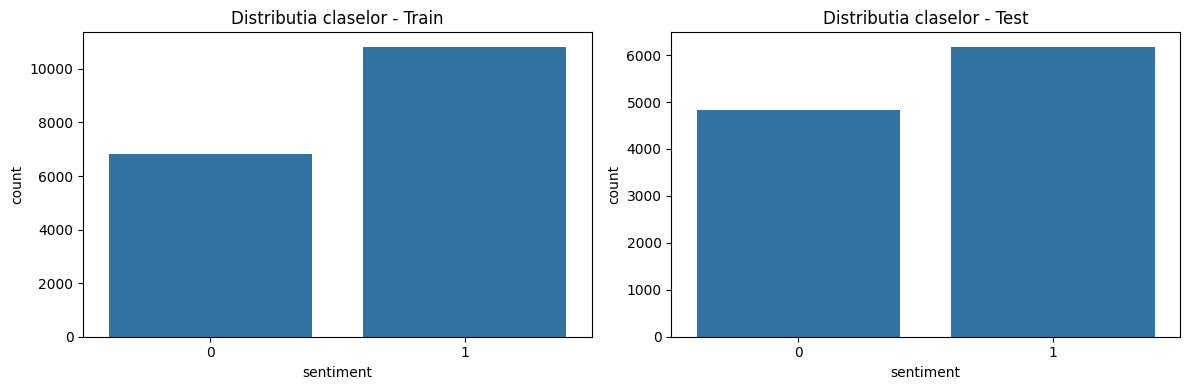

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


train_df["sentiment"] = train_df["label"]
test_df["sentiment"] = test_df["label"]

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(data=train_df, x="sentiment")
plt.title("Distributia claselor - Train")

plt.subplot(1, 2, 2)
sns.countplot(data=test_df, x="sentiment")
plt.title("Distributia claselor - Test")

plt.tight_layout()
plt.show()


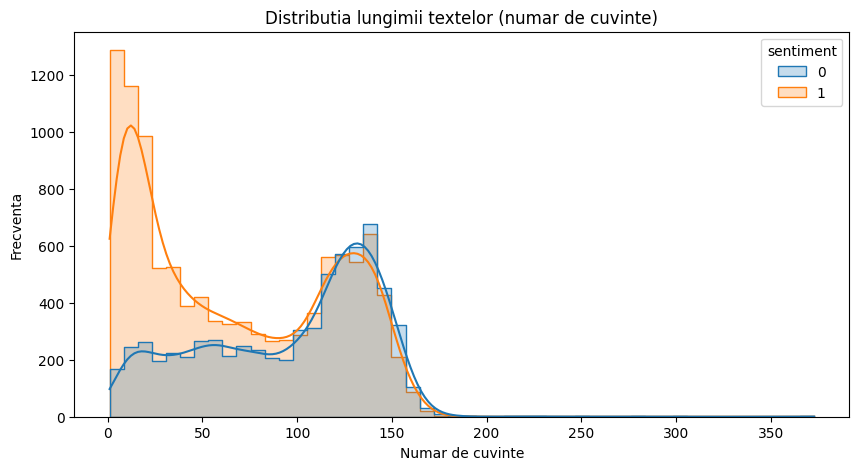

In [10]:
train_df["word_count"] = train_df["text"].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
sns.histplot(
    data=train_df,
    x="word_count",
    hue="sentiment",
    bins=50,
    kde=True,
    element="step"
)
plt.title("Distributia lungimii textelor (numar de cuvinte)")
plt.xlabel("Numar de cuvinte")
plt.ylabel("Frecventa")
plt.show()


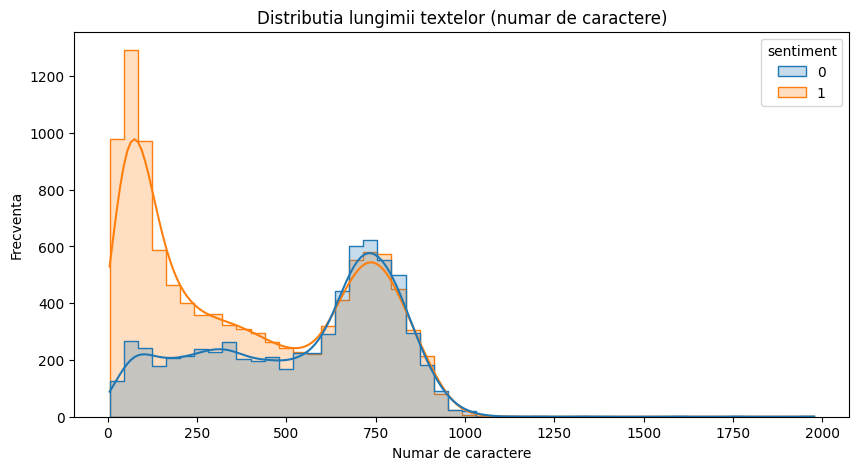

In [11]:
train_df["text_length"] = train_df["text"].apply(lambda x: len(x))

plt.figure(figsize=(10, 5))
sns.histplot(
    data=train_df,
    x="text_length",
    hue="sentiment",
    bins=50,
    kde=True,
    element="step"
)
plt.title("Distributia lungimii textelor (numar de caractere)")
plt.xlabel("Numar de caractere")
plt.ylabel("Frecventa")
plt.show()


In [12]:
from collections import Counter
import re

def tokenize(text):
    text = text.lower()
    text = re.sub(r"[^a-zăâîșț ]", "", text)
    return text.split()

negative_texts = train_df[train_df["label"] == 0]["text"]
positive_texts = train_df[train_df["label"] == 1]["text"]

neg_words = Counter()
pos_words = Counter()

for text in negative_texts:
    neg_words.update(tokenize(text))

for text in positive_texts:
    pos_words.update(tokenize(text))

neg_common = neg_words.most_common(10)
pos_common = pos_words.most_common(10)

neg_df = pd.DataFrame(neg_common, columns=["Cuvant", "Frecventa"])
pos_df = pd.DataFrame(pos_common, columns=["Cuvant", "Frecventa"])



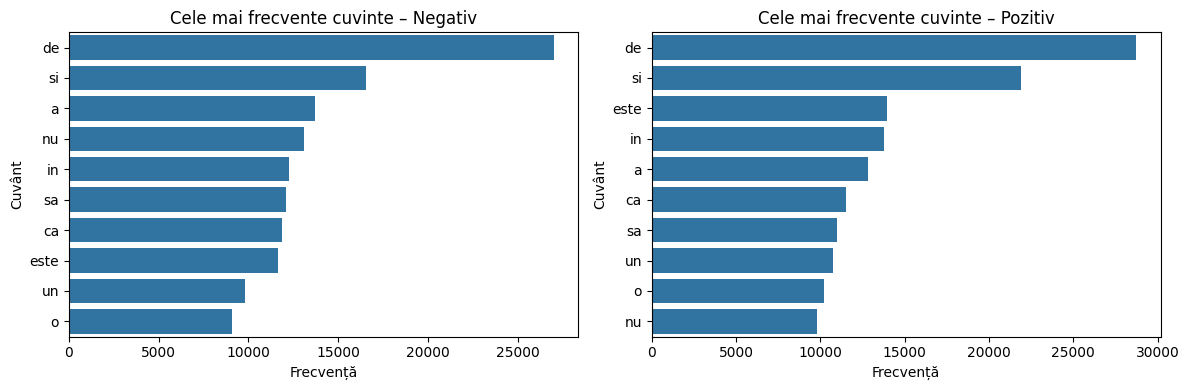

In [13]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.barplot(data=neg_df, x="Frecventa", y="Cuvant")
plt.title("Cele mai frecvente cuvinte – Negativ")

plt.subplot(1, 2, 2)
sns.barplot(data=pos_df, x="Frecventa", y="Cuvant")
plt.title("Cele mai frecvente cuvinte – Pozitiv")

plt.tight_layout()
plt.show()


In [14]:
common_words = set([
    "de", "și", "si", "a", "în", "in", "la", "cu", "pe", "din", "ca",
    "este", "e", "sunt", "sa", "un", "o", "se", "al", "ale",
    "fost", "fi", "fie", "pentru", "care", "ce", "dar",
    "acest", "am", "sau", "lui", "ar", "br", "au", "va"
])

def tokenize(text):
    text = text.lower()
    text = re.sub(r"[^a-zăâîșț ]", "", text)
    tokens = text.split()
    tokens = [t for t in tokens if t not in common_words]
    return tokens


negative_texts = train_df[train_df["label"] == 0]["text"]
positive_texts = train_df[train_df["label"] == 1]["text"]

neg_words = Counter()
pos_words = Counter()

for text in negative_texts:
    neg_words.update(tokenize(text))

for text in positive_texts:
    pos_words.update(tokenize(text))

neg_common = neg_words.most_common(10)
pos_common = pos_words.most_common(10)

neg_df = pd.DataFrame(neg_common, columns=["Cuvant", "Frecventa"])
pos_df = pd.DataFrame(pos_common, columns=["Cuvant", "Frecventa"])




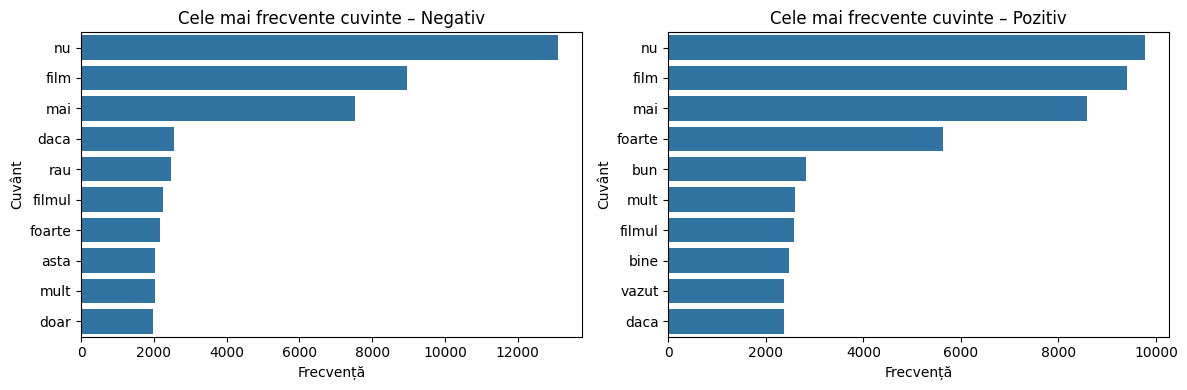

In [15]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.barplot(data=neg_df, x="Frecventa", y="Cuvant")
plt.title("Cele mai frecvente cuvinte – Negativ")

plt.subplot(1, 2, 2)
sns.barplot(data=pos_df, x="Frecventa", y="Cuvant")
plt.title("Cele mai frecvente cuvinte – Pozitiv")

plt.tight_layout()
plt.show()



#Tokenizare si Embedding Layer

In [16]:
nlp = spacy.load(
    "ro_core_news_sm",
    disable=["parser", "ner", "tagger", "lemmatizer"]
)

In [17]:
common_words = set([
    "de", "și", "si", "a", "în", "in", "la", "cu", "pe", "din", "ca",
    "este", "e", "sunt", "sa", "un", "o", "se", "al", "ale",
    "fost", "fi", "fie", "pentru", "care", "ce",
    "acest", "am", "sau", "lui", "ar", "br", "au", "va"
])

def tokenize(doc):
    return [
        token.text
        for token in doc
        if token.is_alpha and token.text not in common_words
    ]

In [18]:
from collections import Counter

all_tokens = []

texts = (text.replace("-", " ").lower() for text in train_df["text"])

for doc in nlp.pipe(texts, batch_size=1000):
    all_tokens.extend(tokenize(doc))

word_freq = Counter(all_tokens)

MAX_VOCAB_SIZE = 20000
most_common_words = word_freq.most_common(MAX_VOCAB_SIZE)


In [19]:
word2idx = {
    "<PAD>": 0,
    "<UNK>": 1
}

for idx, (word, _) in enumerate(most_common_words, start=2):
    word2idx[word] = idx

idx2word = {idx: word for word, idx in word2idx.items()}
vocab_size = len(word2idx)


In [20]:
def encode_text(text):
    text = text.replace("-", " ").lower()
    doc = nlp(text)
    tokens = tokenize(doc)
    return [word2idx.get(token, word2idx["<UNK>"]) for token in tokens]


X_train_seq = train_df["text"].apply(encode_text)
X_test_seq = test_df["text"].apply(encode_text)

y_train = train_df["label"].values
y_test = test_df["label"].values


In [21]:
import numpy as np

embedding_dim = 300
embeddings_index = {}

with open("cc.ro.300.vec", encoding="utf-8") as f:
    next(f)
    for line in f:
        values = line.rstrip().split(" ")
        word = values[0]
        vector = np.asarray(values[1:], dtype="float32")
        embeddings_index[word] = vector


embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, idx in word2idx.items():
    if word in embeddings_index:
        embedding_matrix[idx] = embeddings_index[word]
    else:
        embedding_matrix[idx] = np.random.normal(scale=0.6, size=(embedding_dim,))


In [22]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    trainable=True
)


#Simple RNN

In [27]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_LEN = 50

X_train = pad_sequences(
    X_train_seq,
    maxlen=MAX_LEN,
    padding="post",
    truncating="post"
)

X_test = pad_sequences(
    X_test_seq,
    maxlen=MAX_LEN,
    padding="post",
    truncating="post"
)


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Embedding, SimpleRNN, Dense, Dropout, BatchNormalization)
from tensorflow.keras.optimizers import Adam



# rnn_model = Sequential([
#     embedding_layer,

#     SimpleRNN(128, return_sequences=True),
#     Dropout(0.3),

#     SimpleRNN(64),
#     BatchNormalization(),
#     Dropout(0.3),

#     Dense(1, activation="sigmoid")
# ])


rnn_model = Sequential([
    embedding_layer,

    SimpleRNN(
        units=128,
        return_sequences=False,
        activation="tanh"
    ),

    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation="sigmoid")
])



In [29]:
rnn_model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=5e-5),
    metrics=["accuracy"]
)


In [30]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)


In [31]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_tr),
    y=y_tr
)

class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print("Class weights:", class_weight_dict)


callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True, mode='max'),
    ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, mode='max')
]


history_rnn_simple = rnn_model.fit(
    X_tr, y_tr,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64,
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)

Class weights: {0: np.float64(1.293040293040293), 1: np.float64(0.815242494226328)}
Epoch 1/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.5663 - loss: 0.8314 - val_accuracy: 0.6219 - val_loss: 0.6628 - learning_rate: 5.0000e-05
Epoch 2/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5832 - loss: 0.7502 - val_accuracy: 0.6361 - val_loss: 0.6757 - learning_rate: 5.0000e-05
Epoch 3/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6008 - loss: 0.7314 - val_accuracy: 0.6899 - val_loss: 0.6086 - learning_rate: 5.0000e-05
Epoch 4/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6447 - loss: 0.6705 - val_accuracy: 0.7165 - val_loss: 0.5951 - learning_rate: 5.0000e-05
Epoch 5/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7039 - loss: 0.5789 - val_accuracy: 0.4914 - val_loss: 0.6969 - learning_rate: 5.0000e-05
Epoch 6/20
221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7416 - loss: 0.5160 - val_accuracy: 0.7468 - val_loss: 0.5970 - le

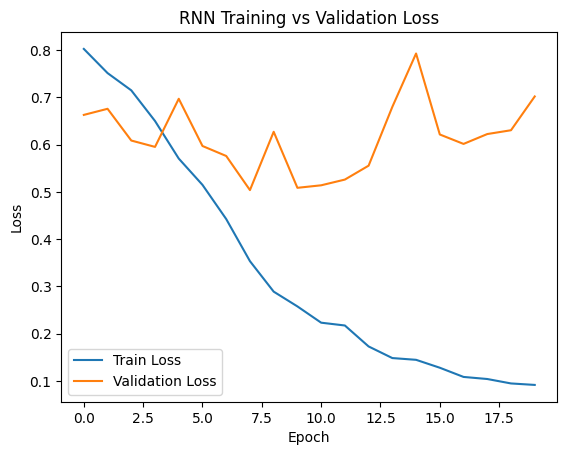

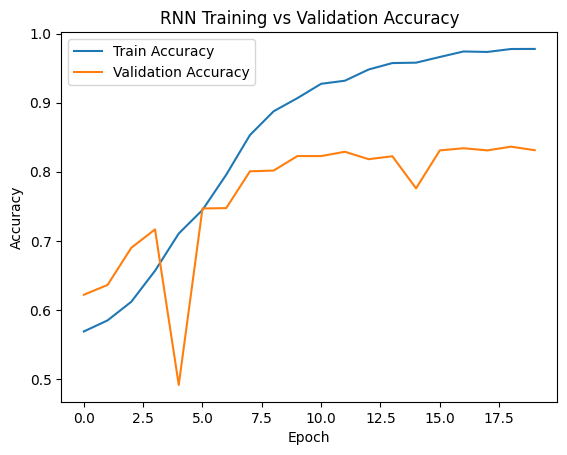

In [32]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history_rnn_simple.history["loss"], label="Train Loss")
plt.plot(history_rnn_simple.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("RNN Training vs Validation Loss")
plt.legend()
plt.show()


plt.figure()
plt.plot(history_rnn_simple.history["accuracy"], label="Train Accuracy")
plt.plot(history_rnn_simple.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("RNN Training vs Validation Accuracy")
plt.legend()
plt.show()


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

def plot_confusion_matrix(y_true, y_pred, model_name="Model"):

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative (0)', 'Positive (1)'],
                yticklabels=['Negative (0)', 'Positive (1)'],
                cbar_kws={'label': 'Count'})

    plt.title(f'Confusion Matrix - {model_name}', fontsize=14, pad=20)
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)

    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    metrics_text = f'Accuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1-Score: {f1:.4f}'
    plt.text(2.5, 0.5, metrics_text, fontsize=10,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
             verticalalignment='center')

    plt.tight_layout()
    plt.show()

    return cm

def evaluate_and_plot(model, X_test, y_test, model_name="Model"):

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"\n{'='*50}")
    print(f"{model_name} - Test Results")
    print(f"{'='*50}")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")

    y_pred_probs = model.predict(X_test, verbose=0)
    y_pred = (y_pred_probs > 0.5).astype(int).flatten()

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred,
                                target_names=['Negative', 'Positive'],
                                digits=4))

    cm = plot_confusion_matrix(y_test, y_pred, model_name)

    return test_loss, test_acc, y_pred, cm


Simple RNN - Test Results
Test Loss: 0.8996
Test Accuracy: 0.7702

Classification Report:
              precision    recall  f1-score   support

    Negative     0.7206    0.7778    0.7481      4828
    Positive     0.8148    0.7643    0.7887      6177

    accuracy                         0.7702     11005
   macro avg     0.7677    0.7710    0.7684     11005
weighted avg     0.7735    0.7702    0.7709     11005



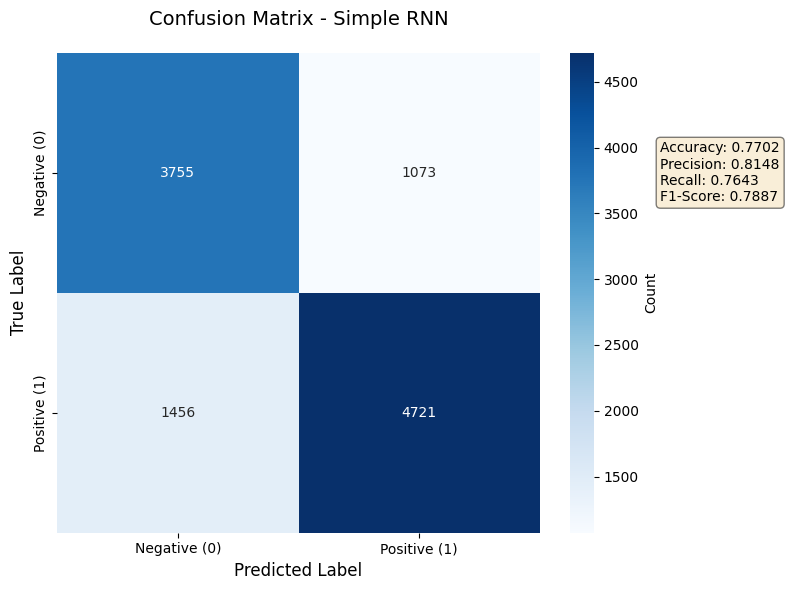

In [35]:
test_loss, test_acc, y_pred, cm = evaluate_and_plot(
    rnn_model, X_test, y_test, "Simple RNN"
)


#Augumentari RNN

In [36]:
import nlpaug.augmenter.word as naw

swap_aug = naw.RandomWordAug(
    action="swap",
    aug_p=0.1
)

delete_aug = naw.RandomWordAug(
    action="delete",
    aug_p=0.1
)


import random

def augment_text(text):
    if random.random() < 0.5:
        text = swap_aug.augment(text)
    if random.random() < 0.5:
        text = delete_aug.augment(text)

    if isinstance(text, list):
        text = text[0]

    return text


augmented_texts = []
augmented_labels = []

for text, label in zip(train_df["text"], train_df["label"]):
    augmented_texts.append(text)
    augmented_labels.append(label)

    augmented_texts.append(augment_text(text))
    augmented_labels.append(label)


aug_train_df = pd.DataFrame({
    "text": augmented_texts,
    "label": augmented_labels
})


In [37]:
X_train_seq = aug_train_df["text"].apply(encode_text)
y_train = aug_train_df["label"].values


In [38]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    trainable=True
)

In [39]:
MAX_LEN = 50

X_train = pad_sequences(
    X_train_seq,
    maxlen=MAX_LEN,
    padding="post",
    truncating="post"
)


X_test = pad_sequences(
    X_test_seq,
    maxlen=MAX_LEN,
    padding="post",
    truncating="post"
)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Embedding, SimpleRNN, Dense, Dropout, BatchNormalization)
from tensorflow.keras.optimizers import Adam

rnn_model = Sequential([
    embedding_layer,

    SimpleRNN(128, return_sequences=True),
    Dropout(0.3),

    SimpleRNN(64),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation="sigmoid")
])


In [41]:
rnn_model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=5e-5),
    metrics=["accuracy"]
)


In [42]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)


In [43]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_tr),
    y=y_tr
)

class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print("Class weights:", class_weight_dict)


callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True, mode='max'),
    ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, mode='max')
]


history_rnn_augs = rnn_model.fit(
    X_tr, y_tr,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64,
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)

Class weights: {0: np.float64(1.29296767695266), 1: np.float64(0.815271362586605)}
Epoch 1/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.5338 - loss: 0.8781 - val_accuracy: 0.6309 - val_loss: 0.6716 - learning_rate: 5.0000e-05
Epoch 2/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5873 - loss: 0.7501 - val_accuracy: 0.7064 - val_loss: 0.5912 - learning_rate: 5.0000e-05
Epoch 3/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.6530 - loss: 0.6645 - val_accuracy: 0.7692 - val_loss: 0.5129 - learning_rate: 5.0000e-05
Epoch 4/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.7361 - loss: 0.5407 - val_accuracy: 0.8077 - val_loss: 0.4631 - learning_rate: 5.0000e-05
Epoch 5/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8391 - loss: 0.4092 - val_accuracy: 0.8636 - val_loss: 0.3560 - learning_rate: 5.0000e-05
Epoch 6/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8962 - loss: 0.2985 - val_accuracy: 0.8589 - val_loss: 0.4073 - 

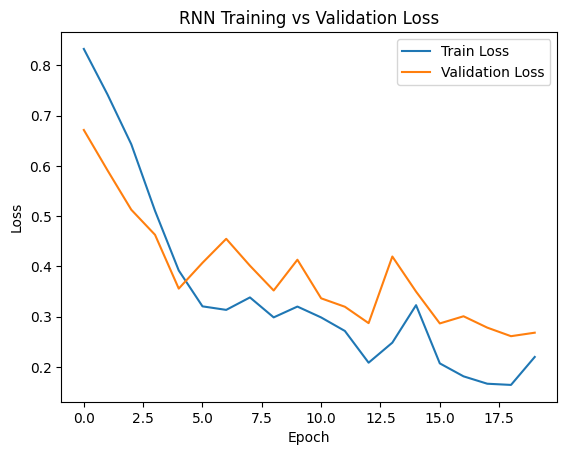

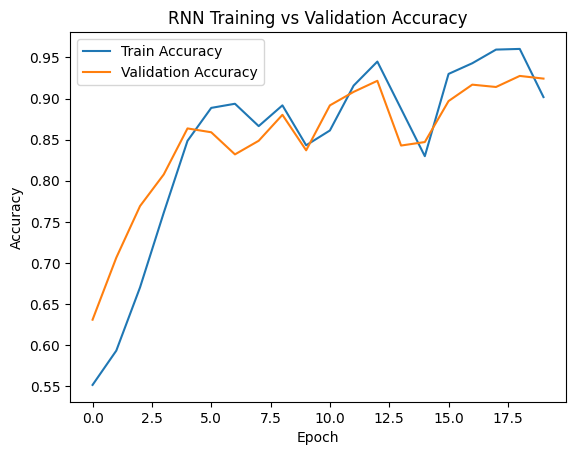

In [44]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history_rnn_augs.history["loss"], label="Train Loss")
plt.plot(history_rnn_augs.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("RNN Training vs Validation Loss")
plt.legend()
plt.show()


plt.figure()
plt.plot(history_rnn_augs.history["accuracy"], label="Train Accuracy")
plt.plot(history_rnn_augs.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("RNN Training vs Validation Accuracy")
plt.legend()
plt.show()



Simple RNN - Test Results
Test Loss: 0.9668
Test Accuracy: 0.7715

Classification Report:
              precision    recall  f1-score   support

    Negative     0.7181    0.7887    0.7518      4828
    Positive     0.8211    0.7580    0.7883      6177

    accuracy                         0.7715     11005
   macro avg     0.7696    0.7734    0.7700     11005
weighted avg     0.7759    0.7715    0.7723     11005



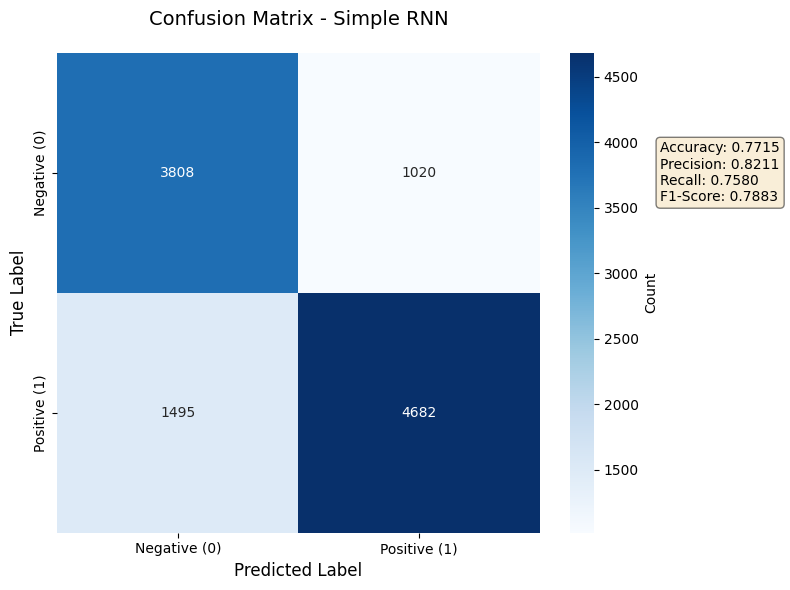

In [45]:
test_loss, test_acc, y_pred, cm = evaluate_and_plot(
    rnn_model, X_test, y_test, "Simple RNN"
)


#Augumentare cu BERT

In [46]:
!pip install transformers torch

from transformers import AutoTokenizer, AutoModelForMaskedLM
import torch
import random

model_name = "dumitrescustefan/bert-base-romanian-cased-v1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
bert_model = AutoModelForMaskedLM.from_pretrained(model_name)
bert_model.eval()

def bert_contextual_augmentation(text, num_replacements=3, top_k=10):
    tokens = text.split()

    if len(tokens) < 3:
        return text

    num_to_replace = min(num_replacements, len(tokens) - 2)
    indices_to_replace = random.sample(range(1, len(tokens) - 1), num_to_replace)

    augmented_text = text

    for idx in indices_to_replace:
        masked_tokens = tokens.copy()
        original_word = masked_tokens[idx]
        masked_tokens[idx] = '[MASK]'
        masked_text = ' '.join(masked_tokens)

        inputs = tokenizer(masked_text, return_tensors='pt', truncation=True, max_length=128)

        mask_token_index = torch.where(inputs['input_ids'][0] == tokenizer.mask_token_id)[0]

        if len(mask_token_index) == 0:
            continue

        with torch.no_grad():
            outputs = bert_model(**inputs)
            predictions = outputs.logits

        mask_token_logits = predictions[0, mask_token_index[0], :]
        top_tokens = torch.topk(mask_token_logits, top_k, dim=0).indices.tolist()

        replacement_candidates = [
            tokenizer.decode([token]).strip()
            for token in top_tokens
        ]

        replacement_candidates = [
            word for word in replacement_candidates
            if word and word != original_word and not word.startswith('##')
            and word.isalpha()
        ]

        if replacement_candidates:
            replacement = random.choice(replacement_candidates[:3])  # din top 3
            tokens[idx] = replacement

    return ' '.join(tokens)


def augment_with_bert(text, augment_prob=0.15):
    tokens = text.split()
    num_to_mask = max(1, int(len(tokens) * augment_prob))

    return bert_contextual_augmentation(text, num_replacements=num_to_mask, top_k=5)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/500M [00:00<?, ?B/s]

Original: filmul este foarte bun și interesant
Augmentat 1: filmul este foarte bun si interesant
Augmentat 2: filmul este foarte interesant și interesant
Augmentat 3: filmul este super bun și interesant


In [47]:
augmented_texts = []
augmented_labels = []

for text, label in zip(train_df["text"], train_df["label"]):
    augmented_texts.append(text)
    augmented_labels.append(label)

    augmented_texts.append(augment_text(text))
    augmented_labels.append(label)

aug_train_df = pd.DataFrame({
    "text": augmented_texts,
    "label": augmented_labels
})


In [48]:
X_train_seq = aug_train_df["text"].apply(encode_text)
y_train = aug_train_df["label"].values

In [49]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    trainable=True
)

In [50]:
MAX_LEN = 50

X_train = pad_sequences(
    X_train_seq,
    maxlen=MAX_LEN,
    padding="post",
    truncating="post"
)


X_test = pad_sequences(
    X_test_seq,
    maxlen=MAX_LEN,
    padding="post",
    truncating="post"
)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Embedding, SimpleRNN, Dense, Dropout, BatchNormalization)
from tensorflow.keras.optimizers import Adam

rnn_model = Sequential([
    embedding_layer,

    SimpleRNN(128, return_sequences=True),
    Dropout(0.3),

    SimpleRNN(64),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation="sigmoid")
])


In [52]:
rnn_model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=5e-5),
    metrics=["accuracy"]
)


In [53]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)


In [54]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_tr),
    y=y_tr
)

class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print("Class weights:", class_weight_dict)


callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True, mode='max'),
    ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, mode='max')
]


history_rnn_bert = rnn_model.fit(
    X_tr, y_tr,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64,
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)

Class weights: {0: np.float64(1.29296767695266), 1: np.float64(0.815271362586605)}
Epoch 1/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.5562 - loss: 0.8306 - val_accuracy: 0.6272 - val_loss: 0.6664 - learning_rate: 5.0000e-05
Epoch 2/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5666 - loss: 0.7536 - val_accuracy: 0.6353 - val_loss: 0.6494 - learning_rate: 5.0000e-05
Epoch 3/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.6054 - loss: 0.7090 - val_accuracy: 0.7241 - val_loss: 0.5658 - learning_rate: 5.0000e-05
Epoch 4/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.6848 - loss: 0.6108 - val_accuracy: 0.7730 - val_loss: 0.5009 - learning_rate: 5.0000e-05
Epoch 5/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.7502 - loss: 0.5054 - val_accuracy: 0.6281 - val_loss: 0.5208 - learning_rate: 5.0000e-05
Epoch 6/20
442/442 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.7933 - loss: 0.4432 - val_accuracy: 0.8132 - val_loss: 0.4547 - 

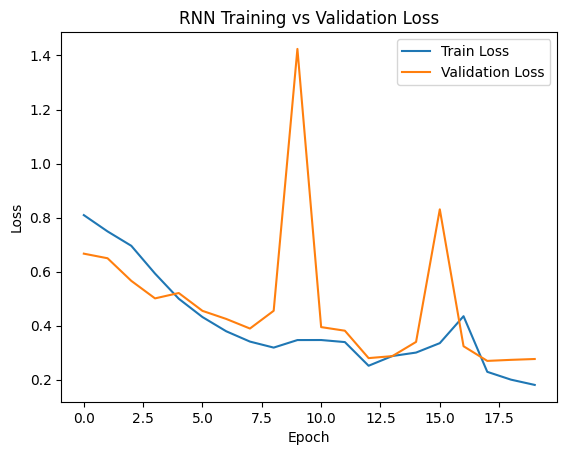

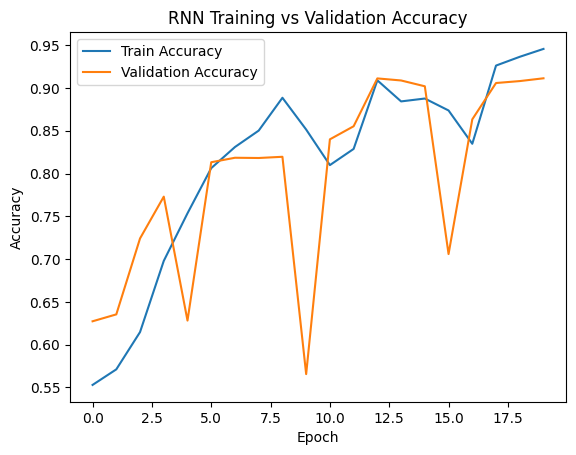

In [55]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history_rnn_bert.history["loss"], label="Train Loss")
plt.plot(history_rnn_bert.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("RNN Training vs Validation Loss")
plt.legend()
plt.show()


plt.figure()
plt.plot(history_rnn_bert.history["accuracy"], label="Train Accuracy")
plt.plot(history_rnn_bert.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("RNN Training vs Validation Accuracy")
plt.legend()
plt.show()



Simple RNN - Test Results
Test Loss: 0.8786
Test Accuracy: 0.7627

Classification Report:
              precision    recall  f1-score   support

    Negative     0.6862    0.8457    0.7577      4828
    Positive     0.8526    0.6977    0.7675      6177

    accuracy                         0.7627     11005
   macro avg     0.7694    0.7717    0.7626     11005
weighted avg     0.7796    0.7627    0.7632     11005



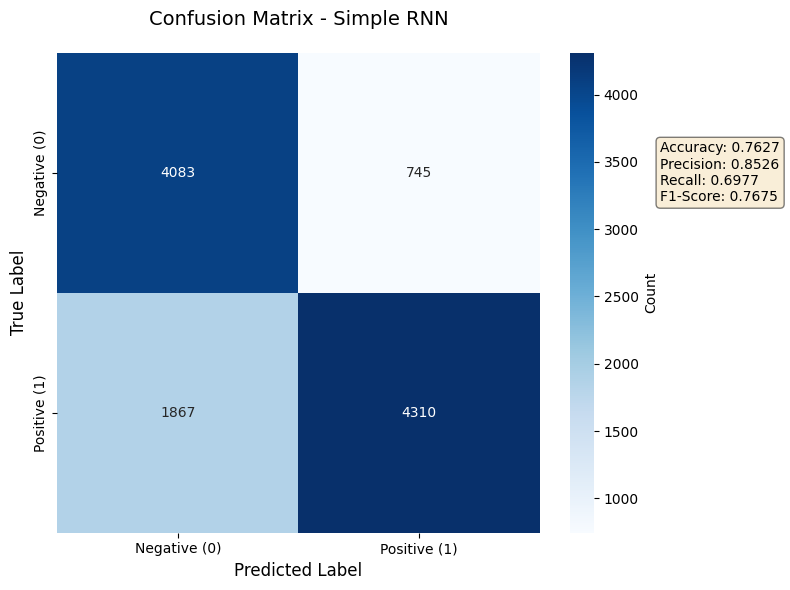

In [56]:
test_loss, test_acc, y_pred, cm = evaluate_and_plot(
    rnn_model, X_test, y_test, "Simple RNN"
)


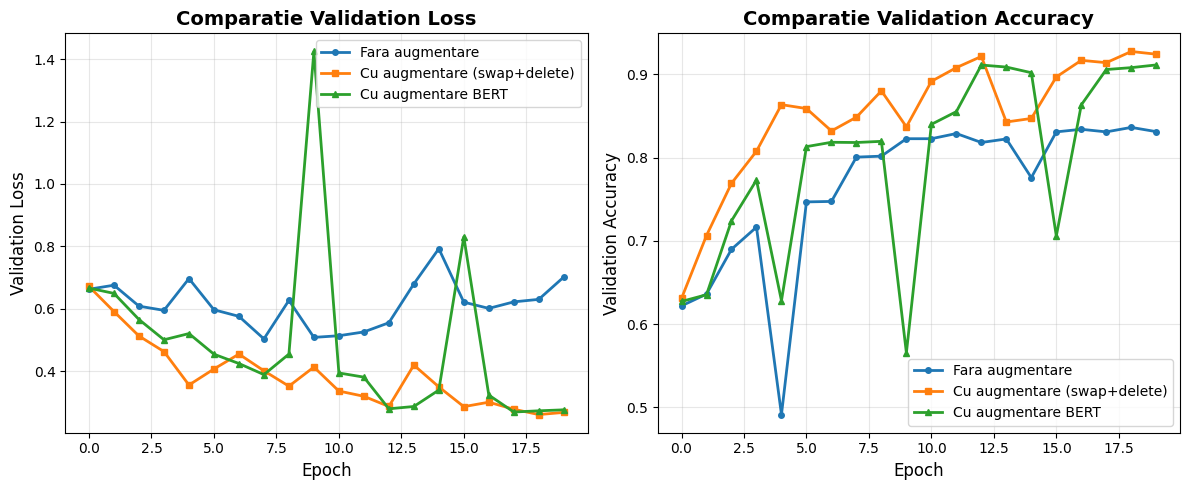

In [58]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_rnn_simple.history["val_loss"], label="Fara augmentare", linewidth=2, marker='o', markersize=4)
plt.plot(history_rnn_augs.history["val_loss"], label="Cu augmentare (swap+delete)", linewidth=2, marker='s', markersize=4)
plt.plot(history_rnn_bert.history["val_loss"], label="Cu augmentare BERT", linewidth=2, marker='^', markersize=4)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Validation Loss", fontsize=12)
plt.title("Comparatie Validation Loss", fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history_rnn_simple.history["val_accuracy"], label="Fara augmentare", linewidth=2, marker='o', markersize=4)
plt.plot(history_rnn_augs.history["val_accuracy"], label="Cu augmentare (swap+delete)", linewidth=2, marker='s', markersize=4)
plt.plot(history_rnn_bert.history["val_accuracy"], label="Cu augmentare BERT", linewidth=2, marker='^', markersize=4)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.title("Comparatie Validation Accuracy", fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#LSTM

In [50]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_LEN = 30

X_train = pad_sequences(
    X_train_seq,
    maxlen=MAX_LEN,
    padding="post",
    truncating="post"
)

X_test = pad_sequences(
    X_test_seq,
    maxlen=MAX_LEN,
    padding="post",
    truncating="post"
)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Embedding, LSTM, Dense, Dropout, BatchNormalization)
from tensorflow.keras.optimizers import Adam

lstm_model_v1 = Sequential([
    embedding_layer,

    LSTM(64,dropout=0.3, recurrent_dropout=0.1),
    BatchNormalization(),


    Dense(1, activation='sigmoid')
])


# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import (Embedding, LSTM, Dense, Dropout, BatchNormalization, Bidirectional)
# from tensorflow.keras.optimizers import Adam

# lstm_model_v1 = Sequential([
#     embedding_layer,

#     LSTM(64, return_sequences=True, dropout=0.3, recurrent_dropout=0.1),
#     LSTM(32, dropout=0.3, recurrent_dropout=0.1),

#     Dense(16, activation='relu'),
#     Dropout(0.4),
#     Dense(1, activation='sigmoid')
# ])

In [52]:
lstm_model_v1.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=1e-4),
    metrics=['accuracy']
)


In [53]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)


In [54]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_tr),
    y=y_tr
)

class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print("Class weights:", class_weight_dict)


callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True, mode='max'),
    ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, mode='max')
]


sample_size = int(len(X_tr) * 0.5)
indices = np.random.choice(len(X_tr), sample_size, replace=False)

X_tr_sample = X_tr[indices]
y_tr_sample = y_tr[indices]

class_weights_sample = compute_class_weight('balanced', classes=np.unique(y_tr_sample), y=y_tr_sample)
class_weight_dict_sample = {0: class_weights_sample[0], 1: class_weights_sample[1]}

history_lstm_simple = lstm_model_v1.fit(
    X_tr_sample, y_tr_sample,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=64,
    class_weight=class_weight_dict_sample,
    callbacks=callbacks,
    verbose=1
)

Class weights: {0: np.float64(1.29296767695266), 1: np.float64(0.815271362586605)}
Epoch 1/15
221/221 ━━━━━━━━━━━━━━━━━━━━ 37s 147ms/step - accuracy: 0.5392 - loss: 0.7182 - val_accuracy: 0.6005 - val_loss: 0.6371 - learning_rate: 1.0000e-04
Epoch 2/15
221/221 ━━━━━━━━━━━━━━━━━━━━ 54s 244ms/step - accuracy: 0.6170 - loss: 0.6389 - val_accuracy: 0.6590 - val_loss: 0.6075 - learning_rate: 1.0000e-04
Epoch 3/15


KeyboardInterrupt: 

In [ ]:
lstm_model_v1.save("/content/drive/MyDrive/lstm_model_v1.keras")
import pickle

with open("/content/drive/MyDrive/history_lstm_v1.pkl", "wb") as f:
    pickle.dump(history_lstm_simple.history, f)


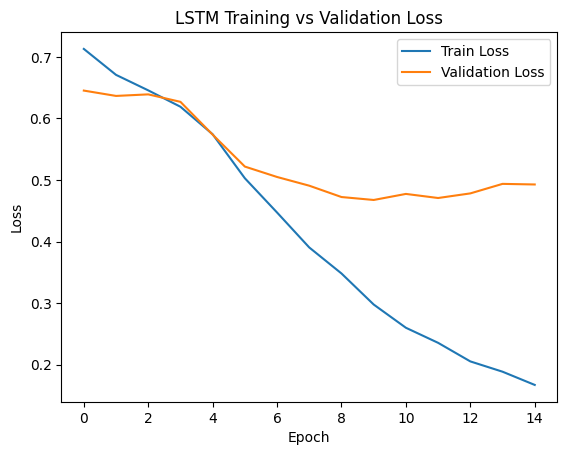

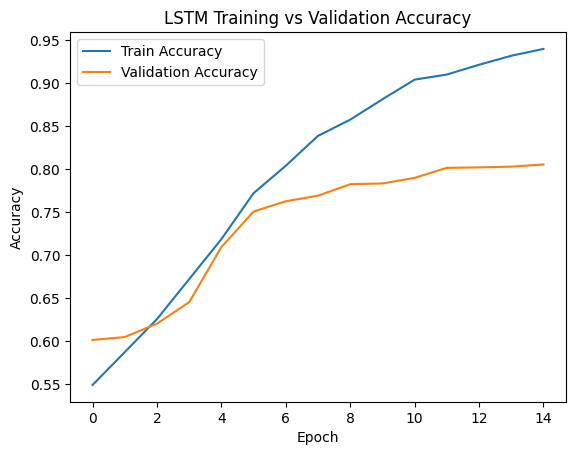

In [28]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history_lstm_simple.history["loss"], label="Train Loss")
plt.plot(history_lstm_simple.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LSTM Training vs Validation Loss")
plt.legend()
plt.show()


plt.figure()
plt.plot(history_lstm_simple.history["accuracy"], label="Train Accuracy")
plt.plot(history_lstm_simple.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("LSTM Training vs Validation Accuracy")
plt.legend()
plt.show()


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

def plot_confusion_matrix(y_true, y_pred, model_name="Model"):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative (0)', 'Positive (1)'],
                yticklabels=['Negative (0)', 'Positive (1)'],
                cbar_kws={'label': 'Count'})

    plt.title(f'Confusion Matrix - {model_name}', fontsize=14, pad=20)
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)

    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    metrics_text = f'Accuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1-Score: {f1:.4f}'
    plt.text(2.5, 0.5, metrics_text, fontsize=10,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
             verticalalignment='center')

    plt.tight_layout()
    plt.show()

    return cm

def evaluate_and_plot(model, X_test, y_test, model_name="Model"):

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"\n{'='*50}")
    print(f"{model_name} - Test Results")
    print(f"{'='*50}")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")

    y_pred_probs = model.predict(X_test, verbose=0)
    y_pred = (y_pred_probs > 0.5).astype(int).flatten()

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred,
                                target_names=['Negative', 'Positive'],
                                digits=4))

    cm = plot_confusion_matrix(y_test, y_pred, model_name)

    return test_loss, test_acc, y_pred, cm


LSTM - Test Results
Test Loss: 0.6390
Test Accuracy: 0.7514

Classification Report:
              precision    recall  f1-score   support

    Negative     0.6825    0.8101    0.7409      4828
    Positive     0.8262    0.7055    0.7611      6177

    accuracy                         0.7514     11005
   macro avg     0.7544    0.7578    0.7510     11005
weighted avg     0.7632    0.7514    0.7522     11005



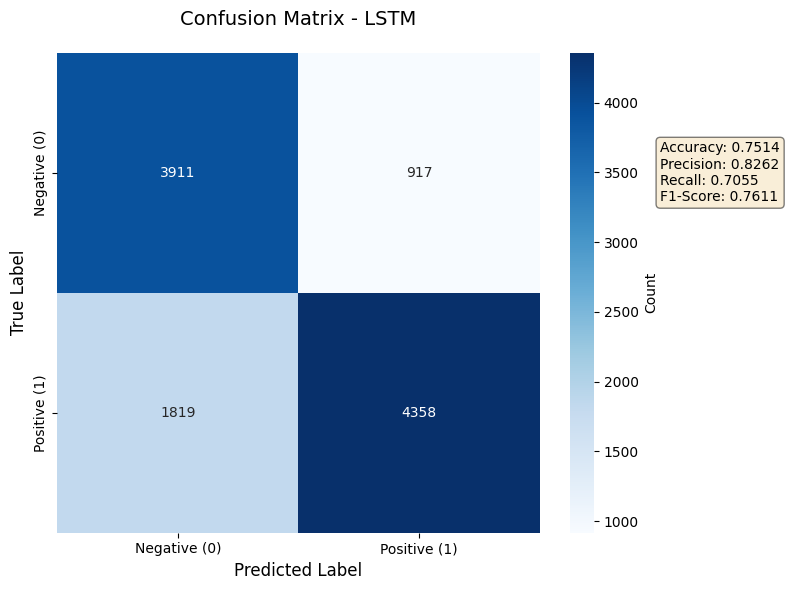

In [30]:
test_loss, test_acc, y_pred, cm = evaluate_and_plot(
    lstm_model_v1, X_test, y_test, "LSTM"
)



# Augumentari LSTM

In [31]:
import nlpaug.augmenter.word as naw

swap_aug = naw.RandomWordAug(
    action="swap",
    aug_p=0.1
)

delete_aug = naw.RandomWordAug(
    action="delete",
    aug_p=0.1
)


import random

def augment_text(text):
    if random.random() < 0.5:
        text = swap_aug.augment(text)
    if random.random() < 0.5:
        text = delete_aug.augment(text)

    if isinstance(text, list):
        text = text[0]

    return text


augmented_texts = []
augmented_labels = []

for text, label in zip(train_df["text"], train_df["label"]):
    augmented_texts.append(text)
    augmented_labels.append(label)

    augmented_texts.append(augment_text(text))
    augmented_labels.append(label)


aug_train_df = pd.DataFrame({
    "text": augmented_texts,
    "label": augmented_labels
})


In [32]:
X_train_seq = aug_train_df["text"].apply(encode_text)
y_train = aug_train_df["label"].values

In [33]:
MAX_LEN = 30

X_train = pad_sequences(
    X_train_seq,
    maxlen=MAX_LEN,
    padding="post",
    truncating="post"
)


X_test = pad_sequences(
    X_test_seq,
    maxlen=MAX_LEN,
    padding="post",
    truncating="post"
)

In [34]:
embedding_layer = Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    trainable=True
)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Embedding, LSTM, Dense, Dropout, BatchNormalization)
from tensorflow.keras.optimizers import Adam

lstm_model_v1 = Sequential([
    embedding_layer,

    LSTM(64,dropout=0.3, recurrent_dropout=0.1),
    BatchNormalization(),


    Dense(1, activation='sigmoid')
])


# lstm_model_v1 = Sequential([
#     embedding_layer,

#     LSTM(64, return_sequences=True, dropout=0.3, recurrent_dropout=0.1),
#     LSTM(32, dropout=0.3, recurrent_dropout=0.1),

#     Dense(16, activation='relu'),
#     Dropout(0.3),
#     Dense(1, activation='sigmoid')
# ])

In [36]:
lstm_model_v1.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=1e-4),
    metrics=['accuracy']
)


In [37]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)


In [38]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_tr),
    y=y_tr
)

class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print("Class weights:", class_weight_dict)


callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True, mode='max'),
    ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, mode='max')
]


sample_size = int(len(X_tr) * 0.3)
indices = np.random.choice(len(X_tr), sample_size, replace=False)

X_tr_sample = X_tr[indices]
y_tr_sample = y_tr[indices]

class_weights_sample = compute_class_weight('balanced', classes=np.unique(y_tr_sample), y=y_tr_sample)
class_weight_dict_sample = {0: class_weights_sample[0], 1: class_weights_sample[1]}

history_lstm_aug = lstm_model_v1.fit(
    X_tr_sample, y_tr_sample,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=64,
    class_weight=class_weight_dict_sample,
    callbacks=callbacks,
    verbose=1
)

Class weights: {0: np.float64(1.29296767695266), 1: np.float64(0.815271362586605)}
Epoch 1/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 29s 167ms/step - accuracy: 0.5402 - loss: 0.7263 - val_accuracy: 0.5979 - val_loss: 0.6374 - learning_rate: 1.0000e-04
Epoch 2/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 19s 143ms/step - accuracy: 0.5656 - loss: 0.6825 - val_accuracy: 0.5984 - val_loss: 0.6327 - learning_rate: 1.0000e-04
Epoch 3/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 23s 165ms/step - accuracy: 0.6244 - loss: 0.6538 - val_accuracy: 0.6200 - val_loss: 0.6211 - learning_rate: 1.0000e-04
Epoch 4/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 19s 141ms/step - accuracy: 0.6898 - loss: 0.6078 - val_accuracy: 0.6740 - val_loss: 0.5955 - learning_rate: 1.0000e-04
Epoch 5/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 27s 203ms/step - accuracy: 0.7411 - loss: 0.5427 - val_accuracy: 0.7325 - val_loss: 0.5437 - learning_rate: 1.0000e-04
Epoch 6/15
133/133 ━━━━━━━━━━━━━━━━━━━━ 36s 167ms/step - accuracy: 0.8005 - loss: 0.4641 - val_accuracy: 0.7785 - val_loss

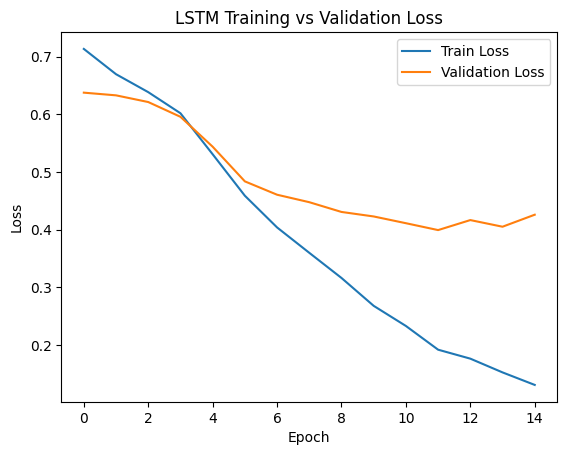

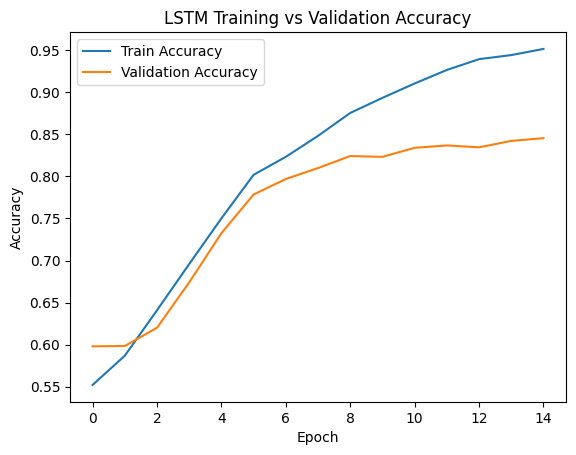

In [39]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history_lstm_aug.history["loss"], label="Train Loss")
plt.plot(history_lstm_aug.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LSTM Training vs Validation Loss")
plt.legend()
plt.show()


plt.figure()
plt.plot(history_lstm_aug.history["accuracy"], label="Train Accuracy")
plt.plot(history_lstm_aug.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("LSTM Training vs Validation Accuracy")
plt.legend()
plt.show()



LSTM - Test Results
Test Loss: 0.7124
Test Accuracy: 0.7452

Classification Report:
              precision    recall  f1-score   support

    Negative     0.6822    0.7848    0.7299      4828
    Positive     0.8094    0.7143    0.7589      6177

    accuracy                         0.7452     11005
   macro avg     0.7458    0.7495    0.7444     11005
weighted avg     0.7536    0.7452    0.7462     11005



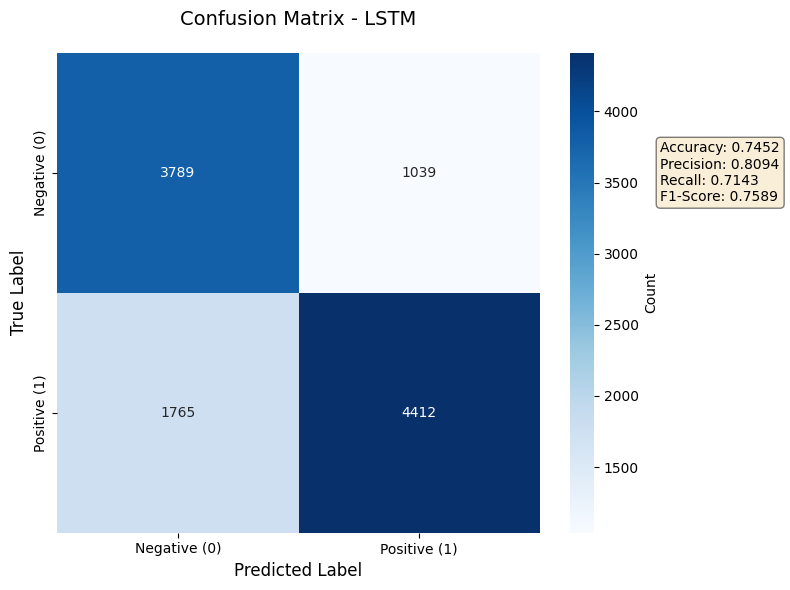

In [40]:
test_loss, test_acc, y_pred, cm = evaluate_and_plot(
    lstm_model_v1, X_test, y_test, "LSTM"
)

# Augumentare cu BERT

In [41]:
!pip install transformers torch

from transformers import AutoTokenizer, AutoModelForMaskedLM
import torch
import random

model_name = "dumitrescustefan/bert-base-romanian-cased-v1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
bert_model = AutoModelForMaskedLM.from_pretrained(model_name)
bert_model.eval()

def bert_contextual_augmentation(text, num_replacements=3, top_k=10):
    tokens = text.split()

    if len(tokens) < 3:
        return text

    num_to_replace = min(num_replacements, len(tokens) - 2)
    indices_to_replace = random.sample(range(1, len(tokens) - 1), num_to_replace)

    augmented_text = text

    for idx in indices_to_replace:
        masked_tokens = tokens.copy()
        original_word = masked_tokens[idx]
        masked_tokens[idx] = '[MASK]'
        masked_text = ' '.join(masked_tokens)

        inputs = tokenizer(masked_text, return_tensors='pt', truncation=True, max_length=128)

        mask_token_index = torch.where(inputs['input_ids'][0] == tokenizer.mask_token_id)[0]

        if len(mask_token_index) == 0:
            continue

        with torch.no_grad():
            outputs = bert_model(**inputs)
            predictions = outputs.logits

        mask_token_logits = predictions[0, mask_token_index[0], :]
        top_tokens = torch.topk(mask_token_logits, top_k, dim=0).indices.tolist()

        replacement_candidates = [
            tokenizer.decode([token]).strip()
            for token in top_tokens
        ]

        replacement_candidates = [
            word for word in replacement_candidates
            if word and word != original_word and not word.startswith('##')
            and word.isalpha()
        ]

        if replacement_candidates:
            replacement = random.choice(replacement_candidates[:3])
            tokens[idx] = replacement

    return ' '.join(tokens)


def augment_with_bert(text, augment_prob=0.15):
    tokens = text.split()
    num_to_mask = max(1, int(len(tokens) * augment_prob))

    return bert_contextual_augmentation(text, num_replacements=num_to_mask, top_k=5)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/500M [00:00<?, ?B/s]

Original: filmul este foarte bun și interesant
Augmentat 1: filmul este foarte bun foarte interesant
Augmentat 2: filmul era foarte bun și interesant
Augmentat 3: filmul este foarte interesant și interesant


In [42]:
augmented_texts = []
augmented_labels = []

for text, label in zip(train_df["text"], train_df["label"]):
    augmented_texts.append(text)
    augmented_labels.append(label)

    augmented_texts.append(augment_text(text))
    augmented_labels.append(label)

aug_train_df = pd.DataFrame({
    "text": augmented_texts,
    "label": augmented_labels
})


In [43]:
X_train_seq = aug_train_df["text"].apply(encode_text)
y_train = aug_train_df["label"].values

In [44]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    trainable=True
)

In [55]:
MAX_LEN = 50

X_train = pad_sequences(
    X_train_seq,
    maxlen=MAX_LEN,
    padding="post",
    truncating="post"
)


X_test = pad_sequences(
    X_test_seq,
    maxlen=MAX_LEN,
    padding="post",
    truncating="post"
)

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Embedding, SimpleRNN, Dense, Dropout, BatchNormalization)
from tensorflow.keras.optimizers import Adam


lstm_model_v1 = Sequential([
    embedding_layer,

    LSTM(64,dropout=0.3, recurrent_dropout=0.1),
    BatchNormalization(),


    Dense(1, activation='sigmoid')
])


# lstm_model_v1 = Sequential([
#     embedding_layer,

#     LSTM(64, return_sequences=True, dropout=0.3, recurrent_dropout=0.1),
#     BatchNormalization(),

#     LSTM(32, dropout=0.3, recurrent_dropout=0.1),
#     BatchNormalization(),

#     Dense(16, activation='relu'),
#     Dropout(0.3),
#     Dense(1, activation='sigmoid')
# ])


In [57]:
lstm_model_v1.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=1e-4),
    metrics=['accuracy']
)

In [58]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

In [59]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_tr),
    y=y_tr
)

class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print("Class weights:", class_weight_dict)


callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True, mode='max'),
    ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, mode='max')
]


sample_size = int(len(X_tr) * 0.5)
indices = np.random.choice(len(X_tr), sample_size, replace=False)

X_tr_sample = X_tr[indices]
y_tr_sample = y_tr[indices]

class_weights_sample = compute_class_weight('balanced', classes=np.unique(y_tr_sample), y=y_tr_sample)
class_weight_dict_sample = {0: class_weights_sample[0], 1: class_weights_sample[1]}

history_lstm_bert = lstm_model_v1.fit(
    X_tr_sample, y_tr_sample,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=128,
    class_weight=class_weight_dict_sample,
    callbacks=callbacks,
    verbose=1
)

Class weights: {0: np.float64(1.29296767695266), 1: np.float64(0.815271362586605)}
Epoch 1/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 32s 245ms/step - accuracy: 0.5271 - loss: 0.7905 - val_accuracy: 0.6203 - val_loss: 0.6522 - learning_rate: 1.0000e-04
Epoch 2/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 27s 241ms/step - accuracy: 0.5690 - loss: 0.6961 - val_accuracy: 0.6195 - val_loss: 0.6350 - learning_rate: 1.0000e-04
Epoch 3/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 27s 240ms/step - accuracy: 0.6194 - loss: 0.6570 - val_accuracy: 0.6309 - val_loss: 0.6213 - learning_rate: 1.0000e-04
Epoch 4/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 26s 234ms/step - accuracy: 0.6674 - loss: 0.6214 - val_accuracy: 0.7051 - val_loss: 0.5840 - learning_rate: 1.0000e-04
Epoch 5/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 41s 236ms/step - accuracy: 0.7304 - loss: 0.5511 - val_accuracy: 0.7772 - val_loss: 0.4804 - learning_rate: 1.0000e-04
Epoch 6/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 25s 222ms/step - accuracy: 0.7913 - loss: 0.4655 - val_accuracy: 0.8165 - val_loss

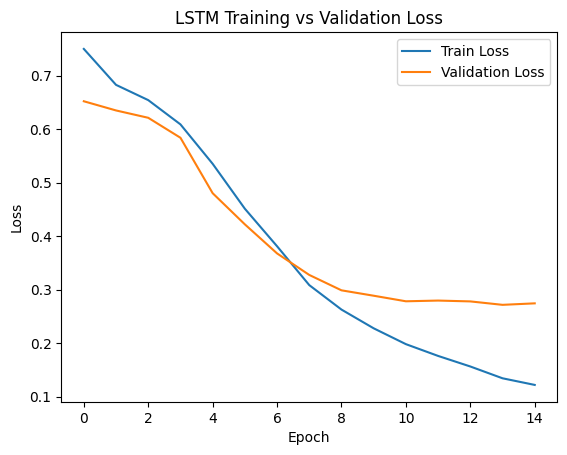

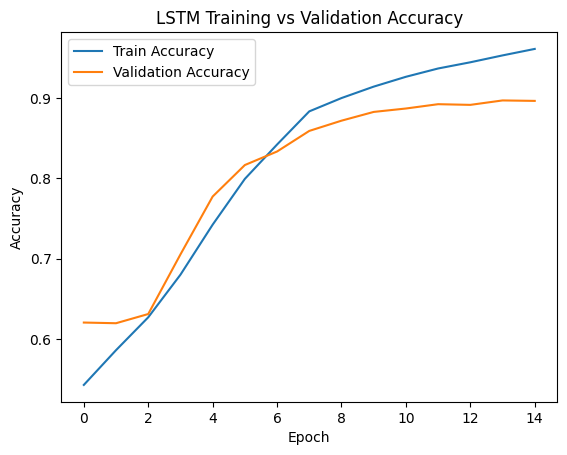

In [60]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history_lstm_bert.history["loss"], label="Train Loss")
plt.plot(history_lstm_bert.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LSTM Training vs Validation Loss")
plt.legend()
plt.show()


plt.figure()
plt.plot(history_lstm_bert.history["accuracy"], label="Train Accuracy")
plt.plot(history_lstm_bert.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("LSTM Training vs Validation Accuracy")
plt.legend()
plt.show()



LSTM - Test Results
Test Loss: 0.5612
Test Accuracy: 0.7977

Classification Report:
              precision    recall  f1-score   support

    Negative     0.7351    0.8426    0.7852      4828
    Positive     0.8611    0.7627    0.8089      6177

    accuracy                         0.7977     11005
   macro avg     0.7981    0.8026    0.7970     11005
weighted avg     0.8058    0.7977    0.7985     11005



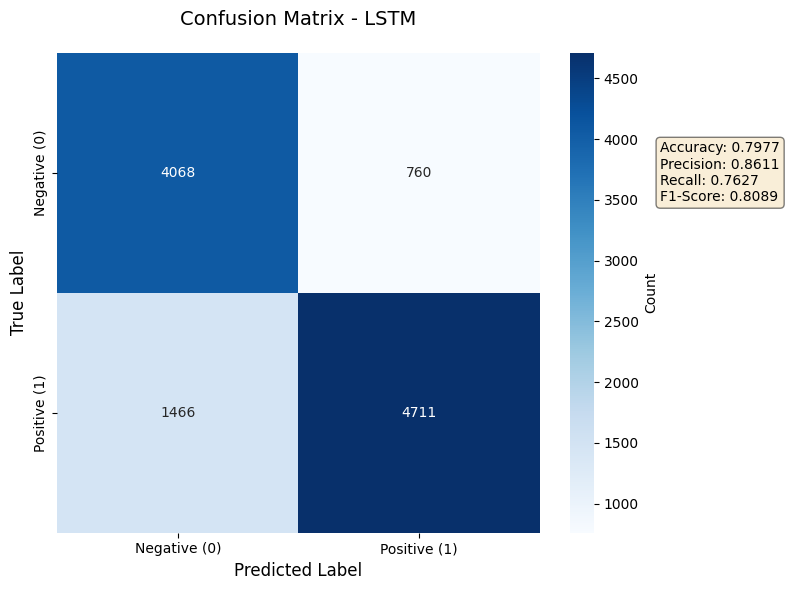

In [61]:
test_loss, test_acc, y_pred, cm = evaluate_and_plot(
    lstm_model_v1, X_test, y_test, "LSTM"
)

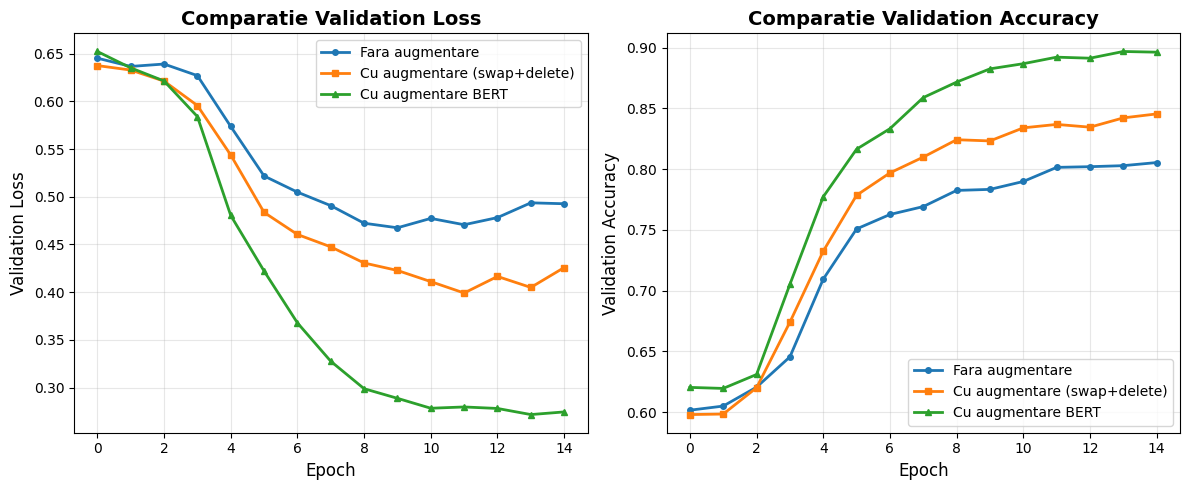

In [63]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_lstm_simple.history["val_loss"], label="Fara augmentare", linewidth=2, marker='o', markersize=4)
plt.plot(history_lstm_aug.history["val_loss"], label="Cu augmentare (swap+delete)", linewidth=2, marker='s', markersize=4)
plt.plot(history_lstm_bert.history["val_loss"], label="Cu augmentare BERT", linewidth=2, marker='^', markersize=4)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Validation Loss", fontsize=12)
plt.title("Comparatie Validation Loss", fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history_lstm_simple.history["val_accuracy"], label="Fara augmentare", linewidth=2, marker='o', markersize=4)
plt.plot(history_lstm_aug.history["val_accuracy"], label="Cu augmentare (swap+delete)", linewidth=2, marker='s', markersize=4)
plt.plot(history_lstm_bert.history["val_accuracy"], label="Cu augmentare BERT", linewidth=2, marker='^', markersize=4)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.title("Comparatie Validation Accuracy", fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#